# Czynniki wpływające na wynik APGAR - równy rozkład
## W tym notebooku przeanalizujemy ten sam dataset, ale tym razem z równym rozkładem (identyczna liczba przypadków dobrego wyniku APGAR jak i złego)
### Instalacja potrzebnych bibliotek

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

### Import używanych bibliotek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

### Wczytanie danych

In [3]:
df = pd.read_csv('../natality_dataset_equal.csv')
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Cigarettes Before Pregnancy,Cigarettes 1st Trimester,Cigarettes 2nd Trimester,Cigarettes 3rd Trimester,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,No Infections Reported,Five Minute APGAR Score,Five Minute APGAR Recode
0,25,4,0,0,0,0,26.5,3,1,1,8,3
1,28,4,0,0,0,0,24.0,2,0,1,10,4
2,36,6,0,0,0,0,31.6,4,1,1,9,4
3,32,5,0,0,0,0,24.0,2,1,1,9,4
4,39,6,0,0,0,0,23.8,2,0,0,9,4


In [4]:
df.shape

(100000, 12)

In [5]:
df.columns

Index(['Mothers Single Years of Age', 'Mothers Age Recode 9',
       'Cigarettes Before Pregnancy', 'Cigarettes 1st Trimester',
       'Cigarettes 2nd Trimester', 'Cigarettes 3rd Trimester',
       'Body Mass Index', 'Body Mass Index Recode', 'No Risk Factors Reported',
       'No Infections Reported', 'Five Minute APGAR Score',
       'Five Minute APGAR Recode'],
      dtype='object')

### EDA
Nie będziemy dokładnie analizować zbiór danych, który mamy gdyż zrobiliśmy to już w poprzednim notebooku

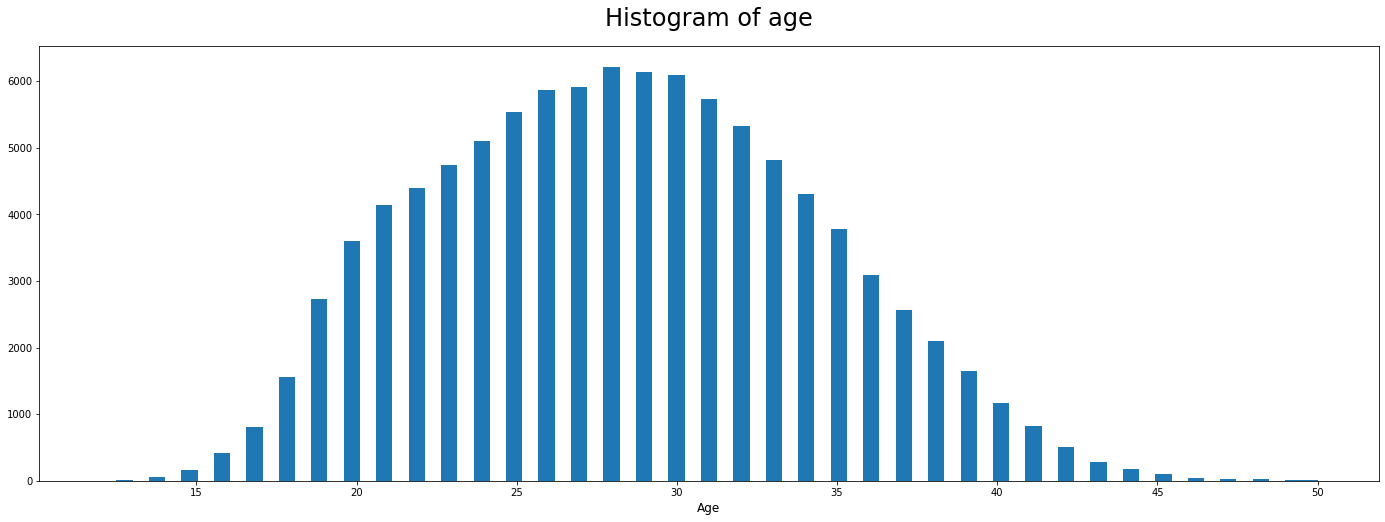

In [6]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of age", fontsize=24, pad=20)
plt.xlabel('Age', fontsize=12)
plt.hist(df['Mothers Single Years of Age'], bins=75)
plt.show()

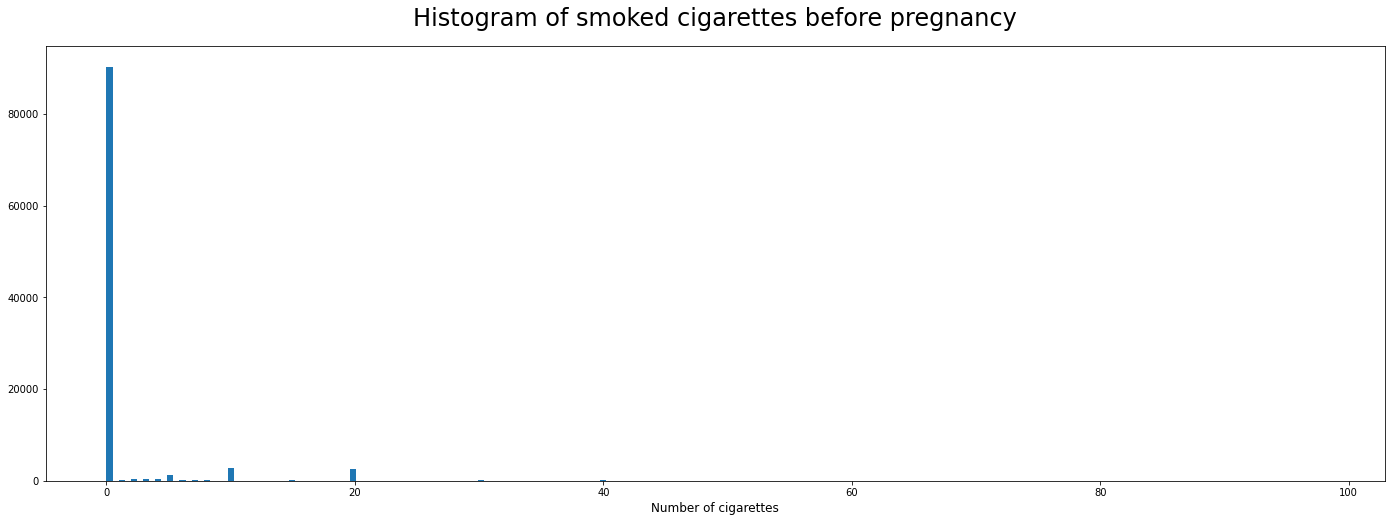

In [7]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes before pregnancy", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes Before Pregnancy'], bins=200)
plt.show()

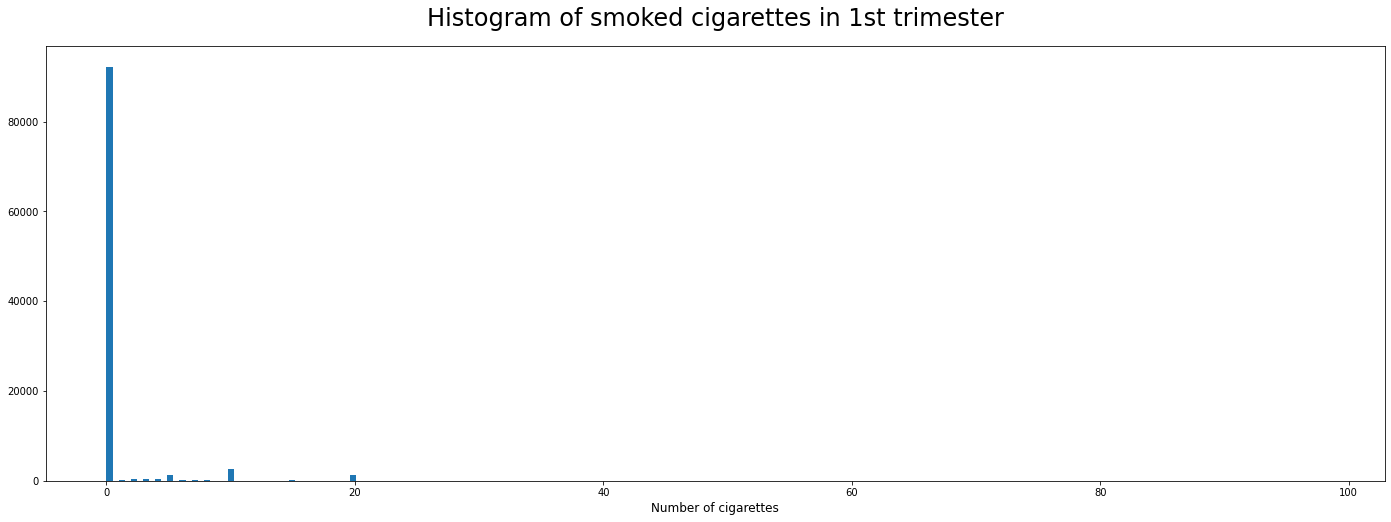

In [8]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 1st trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 1st Trimester'], bins=200)
plt.show()

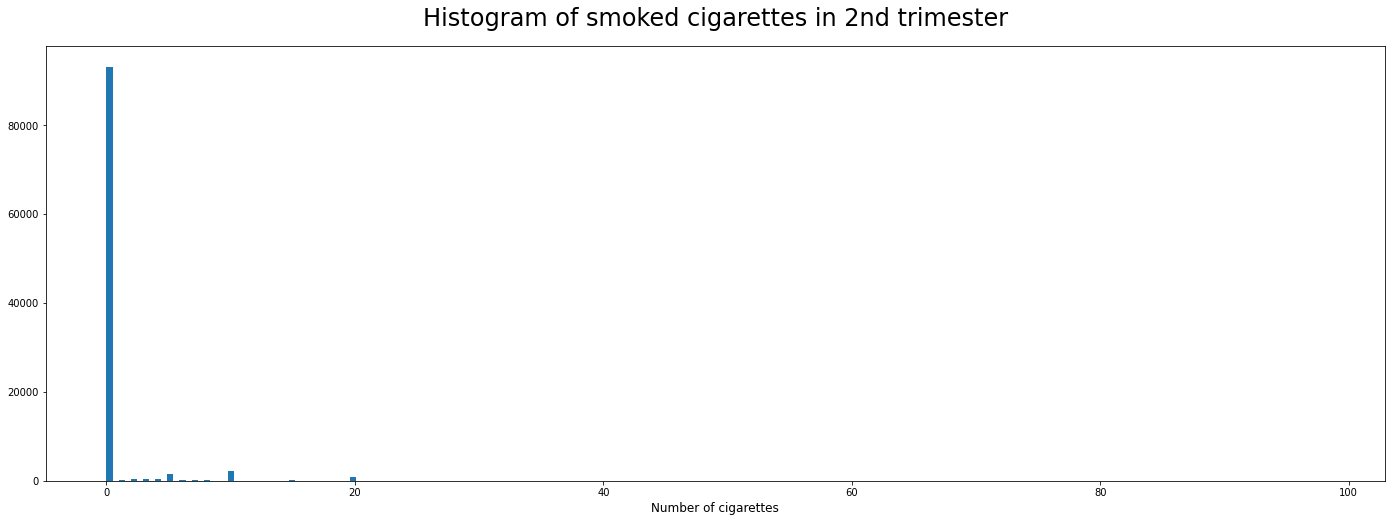

In [9]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 2nd trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 2nd Trimester'], bins=200)
plt.show()

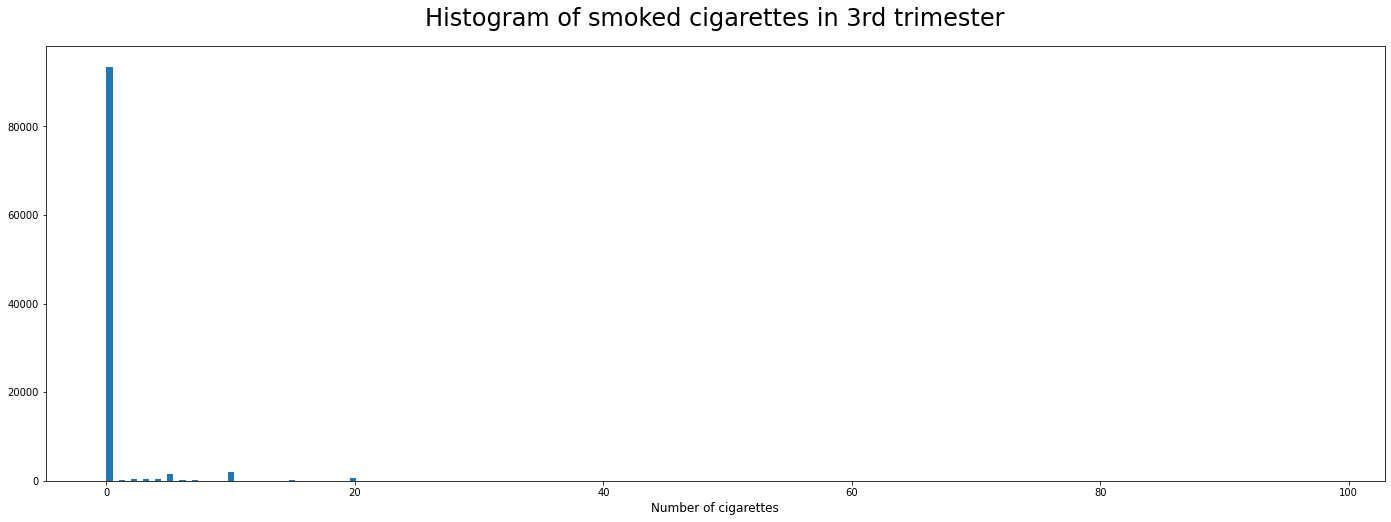

In [10]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 3rd trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 3rd Trimester'], bins=200)
plt.show()

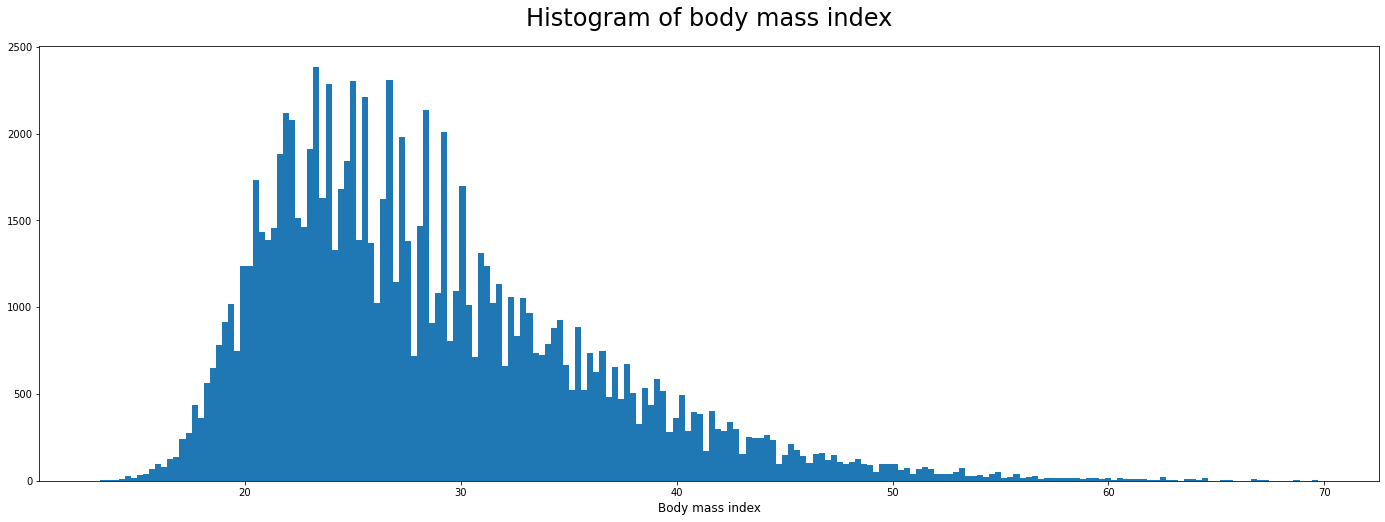

In [11]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of body mass index", fontsize=24, pad=20)
plt.xlabel('Body mass index', fontsize=12)
plt.hist(df['Body Mass Index'], bins=200)
plt.show()

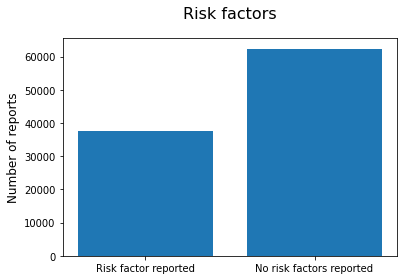

In [12]:
plt.title("Risk factors", fontsize=16, pad=20)
plt.bar(['Risk factor reported', 'No risk factors reported'], df['No Risk Factors Reported'].value_counts().sort_index())
plt.ylabel("Number of reports", fontsize=12)
plt.show()

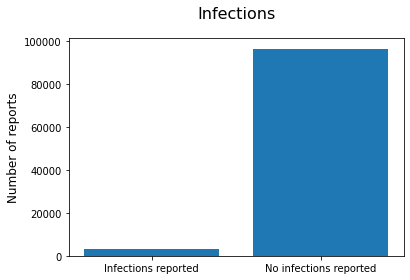

In [13]:
plt.title("Infections", fontsize=16, pad=20)
plt.bar(['Infections reported', 'No infections reported'], df['No Infections Reported'].value_counts().sort_index())
plt.ylabel("Number of reports", fontsize=12)
plt.show()

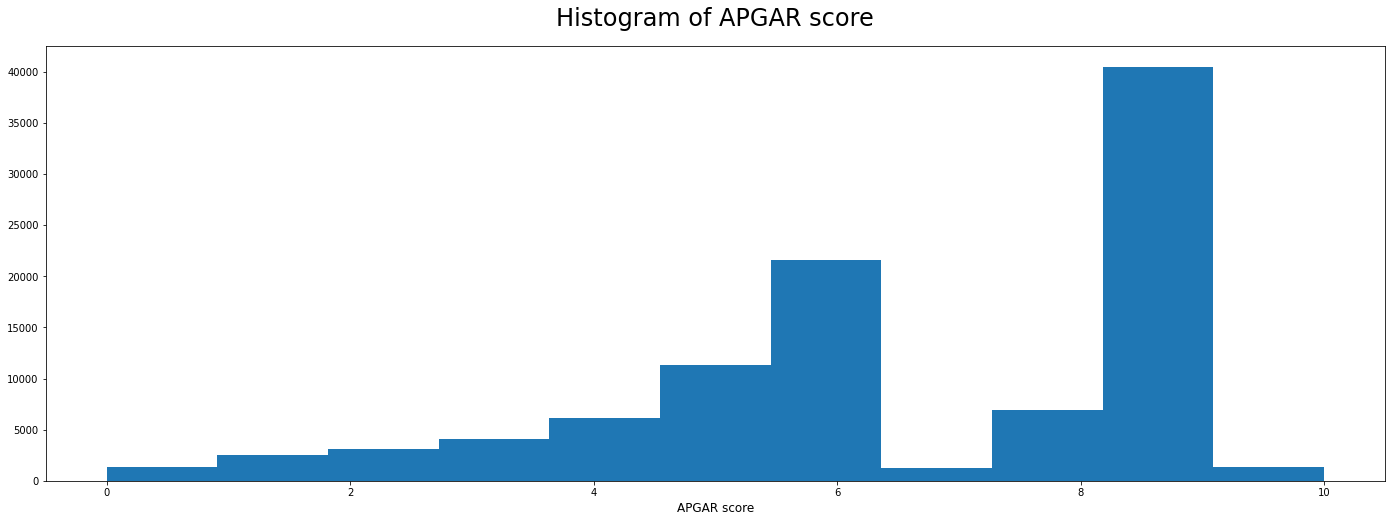

In [14]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of APGAR score", fontsize=24, pad=20)
plt.xlabel('APGAR score', fontsize=12)
plt.hist(df['Five Minute APGAR Score'], bins=11)
plt.show()

Warto tutaj zauważyć, że mimo sprawienia, że liczba słabych i dobrych wyników APGAR jest identyczna wciąż dominują wysoki wyniki APGAR (ze słabych wyników najbardziej dominuje wynik 6). Warto zauważyć, że trudno będzie uzyskać lepszy dataset gdyż do uzyskania tego datasetu wykorzystaliśmy aż 2/3 posiadanego datasetu. Nie mamy więc wiele możliwości, żeby zmienić kształt powyższego histogramu gdyż brakuje nam danych dzieci mających bardzo niski wynik APGAR

In [15]:
df['Five Minute APGAR Score'].value_counts()

9     40490
6     21605
5     11273
8      6967
4      6114
3      4046
2      3091
1      2525
0      1346
10     1301
7      1242
Name: Five Minute APGAR Score, dtype: int64

### Konwersja zbioru danych

In [16]:
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Cigarettes Before Pregnancy,Cigarettes 1st Trimester,Cigarettes 2nd Trimester,Cigarettes 3rd Trimester,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,No Infections Reported,Five Minute APGAR Score,Five Minute APGAR Recode
0,25,4,0,0,0,0,26.5,3,1,1,8,3
1,28,4,0,0,0,0,24.0,2,0,1,10,4
2,36,6,0,0,0,0,31.6,4,1,1,9,4
3,32,5,0,0,0,0,24.0,2,1,1,9,4
4,39,6,0,0,0,0,23.8,2,0,0,9,4


In [17]:
def is_smoking_during_pregnancy(cig_1st, cig_2nd, cig_3rd):
    return int(sum([cig_1st, cig_2nd, cig_3rd]) > 0)
    
df['Smoked during pregnancy'] = df.apply(lambda x: is_smoking_during_pregnancy(x['Cigarettes 1st Trimester'], x['Cigarettes 2nd Trimester'], x['Cigarettes 3rd Trimester']), axis=1)
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Cigarettes Before Pregnancy,Cigarettes 1st Trimester,Cigarettes 2nd Trimester,Cigarettes 3rd Trimester,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,No Infections Reported,Five Minute APGAR Score,Five Minute APGAR Recode,Smoked during pregnancy
0,25,4,0,0,0,0,26.5,3,1,1,8,3,0
1,28,4,0,0,0,0,24.0,2,0,1,10,4,0
2,36,6,0,0,0,0,31.6,4,1,1,9,4,0
3,32,5,0,0,0,0,24.0,2,1,1,9,4,0
4,39,6,0,0,0,0,23.8,2,0,0,9,4,0


In [18]:
def is_apgar_score_good(apgar_score):
    return int(apgar_score >= 7)

df['APGAR score'] = df['Five Minute APGAR Score'].map(lambda x: is_apgar_score_good(x))
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Cigarettes Before Pregnancy,Cigarettes 1st Trimester,Cigarettes 2nd Trimester,Cigarettes 3rd Trimester,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,No Infections Reported,Five Minute APGAR Score,Five Minute APGAR Recode,Smoked during pregnancy,APGAR score
0,25,4,0,0,0,0,26.5,3,1,1,8,3,0,1
1,28,4,0,0,0,0,24.0,2,0,1,10,4,0,1
2,36,6,0,0,0,0,31.6,4,1,1,9,4,0,1
3,32,5,0,0,0,0,24.0,2,1,1,9,4,0,1
4,39,6,0,0,0,0,23.8,2,0,0,9,4,0,1


In [19]:
df.drop(['Cigarettes Before Pregnancy', 'Cigarettes 1st Trimester', 'Cigarettes 2nd Trimester', 'Cigarettes 3rd Trimester', 'No Infections Reported', 'Five Minute APGAR Score', 'Five Minute APGAR Recode'], axis=1, inplace=True)
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,Smoked during pregnancy,APGAR score
0,25,4,26.5,3,1,0,1
1,28,4,24.0,2,0,0,1
2,36,6,31.6,4,1,0,1
3,32,5,24.0,2,1,0,1
4,39,6,23.8,2,0,0,1


### EDA

In [20]:
def get_mothers_age_description(age_recode):
    if age_recode == 1:
        return 'Under 15'
    elif age_recode == 2:
        return '15-19'
    elif age_recode == 3:
        return '20-24'
    elif age_recode == 4:
        return '25-29'
    elif age_recode == 5:
        return '30-34'
    elif age_recode == 6:
        return '35-39'
    elif age_recode == 7:
        return '40-44'
    elif age_recode == 8:
        return '45-49'
    elif age_recode == 9:
        return '50-54'
    else:
        return 'ERROR'
    
def get_body_mass_description(body_mass_recode):
    if body_mass_recode == 1:
        return 'Underweight'
    elif body_mass_recode == 2:
        return 'Normal'
    elif body_mass_recode == 3:
        return "Overweight"
    elif body_mass_recode == 4:
        return "Obesity I"
    elif body_mass_recode == 5:
        return "Obesity II"
    elif body_mass_recode == 6:
        return "Extreme Obesity III"
    else:
        return "ERROR"
    
df['Mothers age description'] = df['Mothers Age Recode 9'].map(lambda x: get_mothers_age_description(x))
df['Body mass index description'] = df['Body Mass Index Recode'].map(lambda x: get_body_mass_description(x))
df['No Risk Factors Reported description'] = df['No Risk Factors Reported'].map(lambda x: "No risk factors reported" if x==1 else "Risk factors reported")
df['Smoking during pregnancy description'] = df['Smoked during pregnancy'].map(lambda x: "Smoked during pregnancy" if x==1 else "Didn't smoke during pregnancy")
df['APGAR score description'] = df['APGAR score'].map(lambda x: "Good" if x==1 else "Bad")
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,Smoked during pregnancy,APGAR score,Mothers age description,Body mass index description,No Risk Factors Reported description,Smoking during pregnancy description,APGAR score description
0,25,4,26.5,3,1,0,1,25-29,Overweight,No risk factors reported,Didn't smoke during pregnancy,Good
1,28,4,24.0,2,0,0,1,25-29,Normal,Risk factors reported,Didn't smoke during pregnancy,Good
2,36,6,31.6,4,1,0,1,35-39,Obesity I,No risk factors reported,Didn't smoke during pregnancy,Good
3,32,5,24.0,2,1,0,1,30-34,Normal,No risk factors reported,Didn't smoke during pregnancy,Good
4,39,6,23.8,2,0,0,1,35-39,Normal,Risk factors reported,Didn't smoke during pregnancy,Good


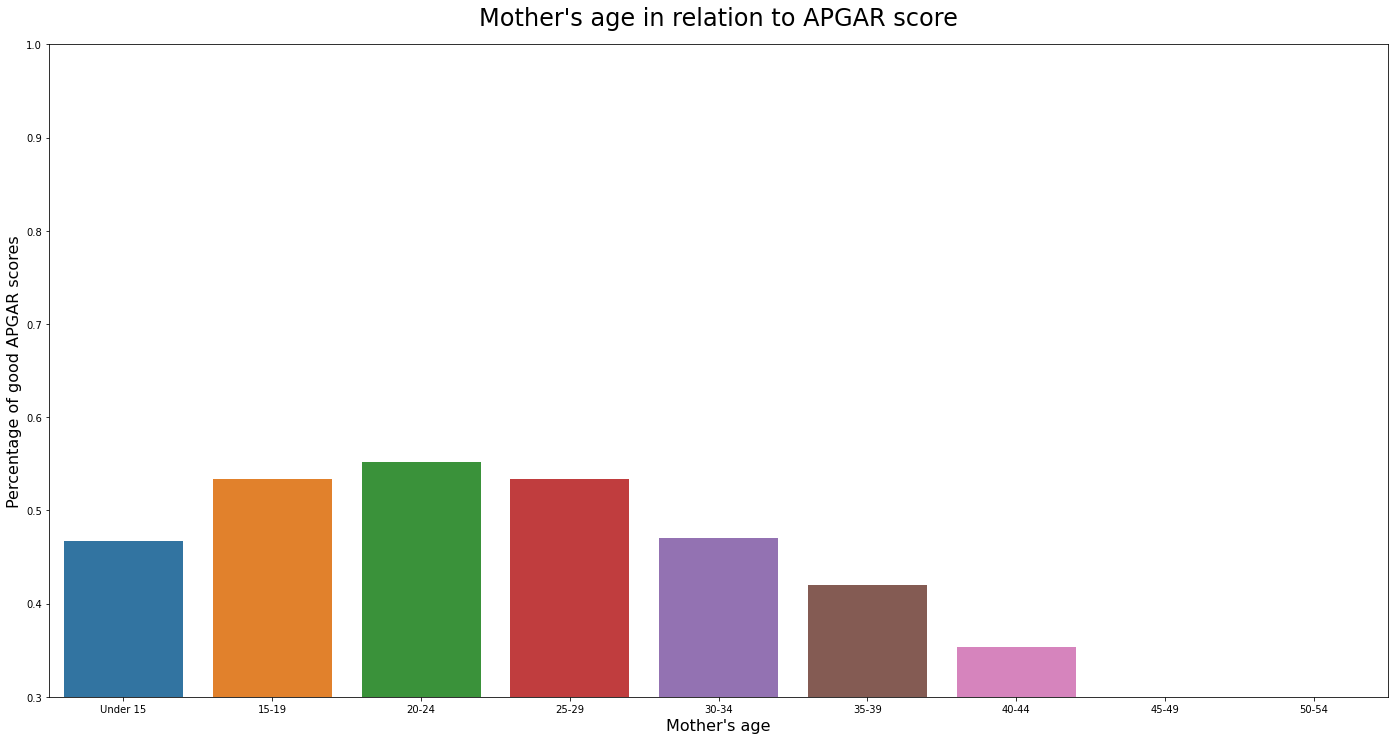

In [21]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Mothers age description', y='APGAR score', data=df.sort_values('Mothers Age Recode 9'), ci=None)
plt.title("Mother's age in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Mother's age", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.3, 1)
plt.show()

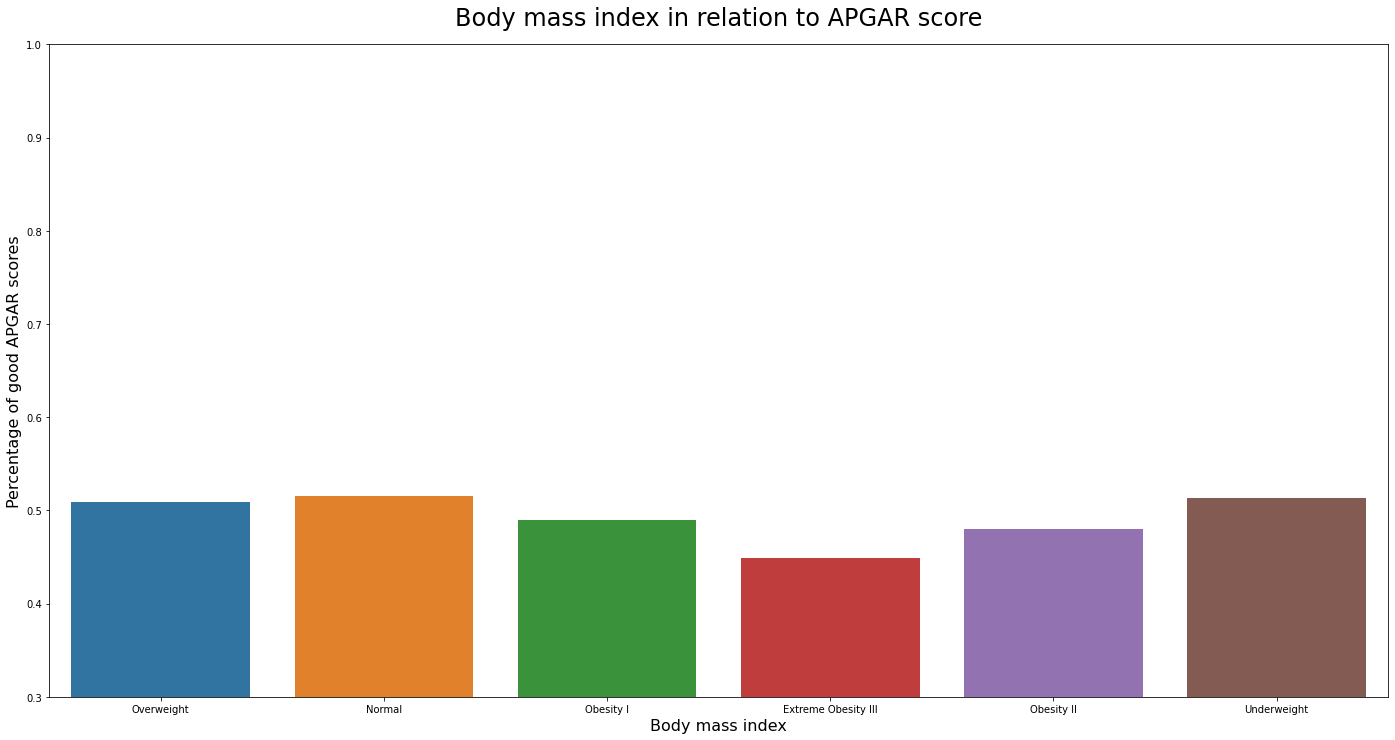

In [22]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Body mass index description', y='APGAR score', data=df, ci=None)
plt.title("Body mass index in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Body mass index", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.3, 1)
plt.show()

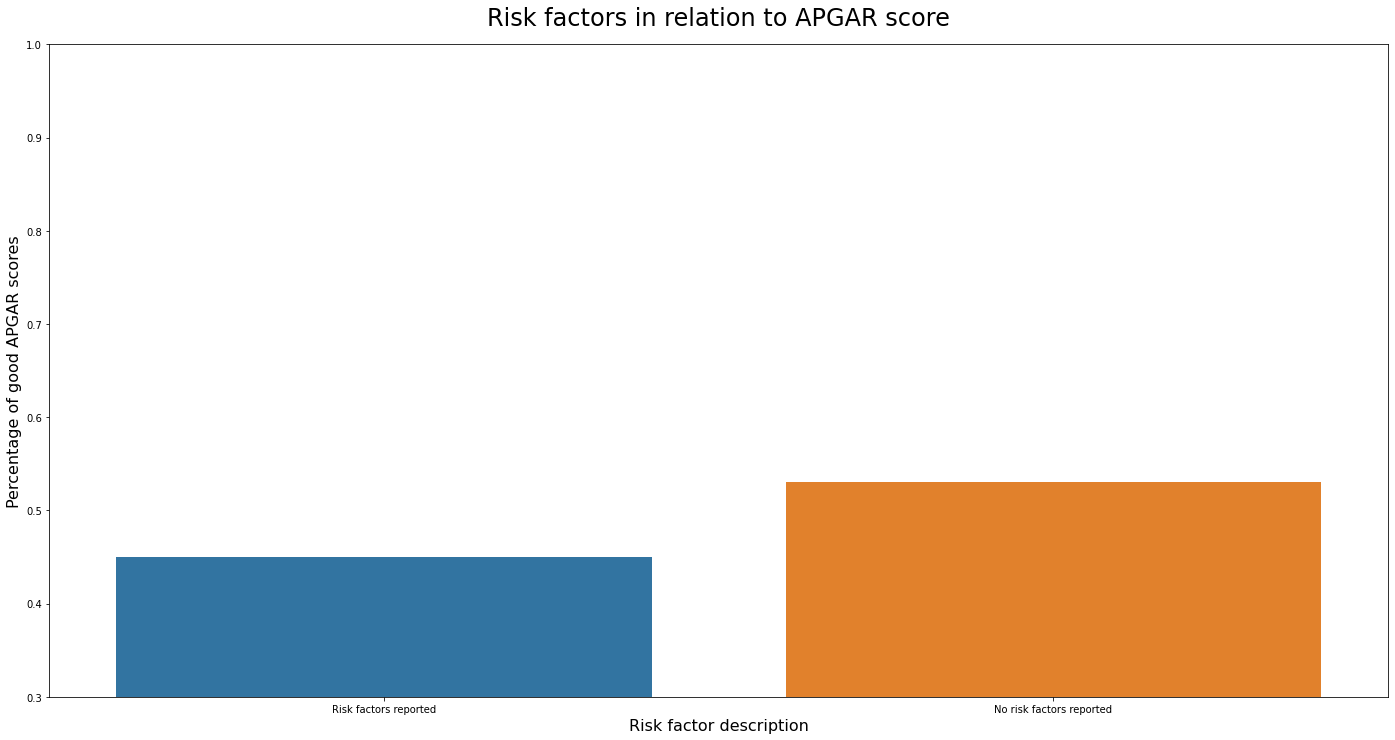

In [23]:
plt.figure(figsize=(24, 12))
sns.barplot(x='No Risk Factors Reported description', y='APGAR score', data=df.sort_values('No Risk Factors Reported'), ci=None)
plt.title("Risk factors in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Risk factor description", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.3, 1)
plt.show()

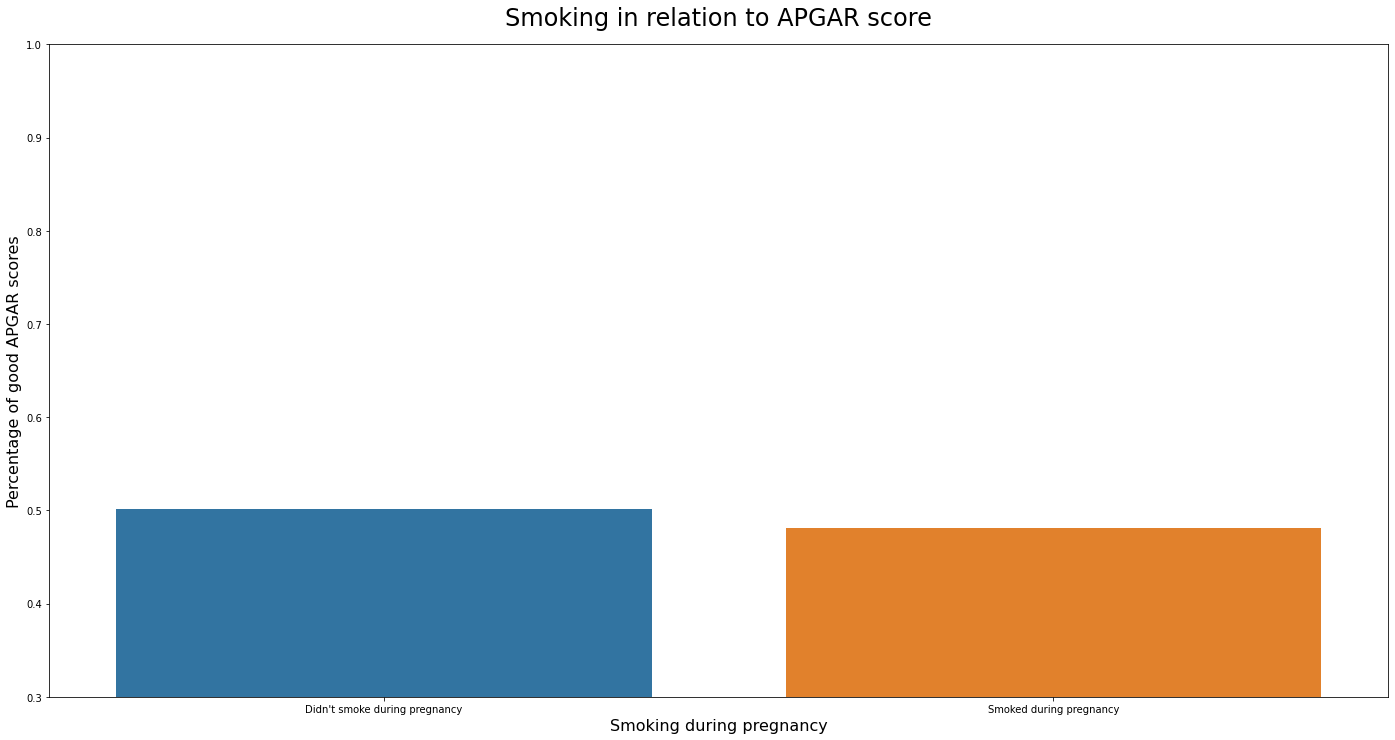

In [24]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Smoking during pregnancy description', y='APGAR score', data=df.sort_values('Smoked during pregnancy'), ci=None)
plt.title("Smoking in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Smoking during pregnancy", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.3, 1)
plt.show()

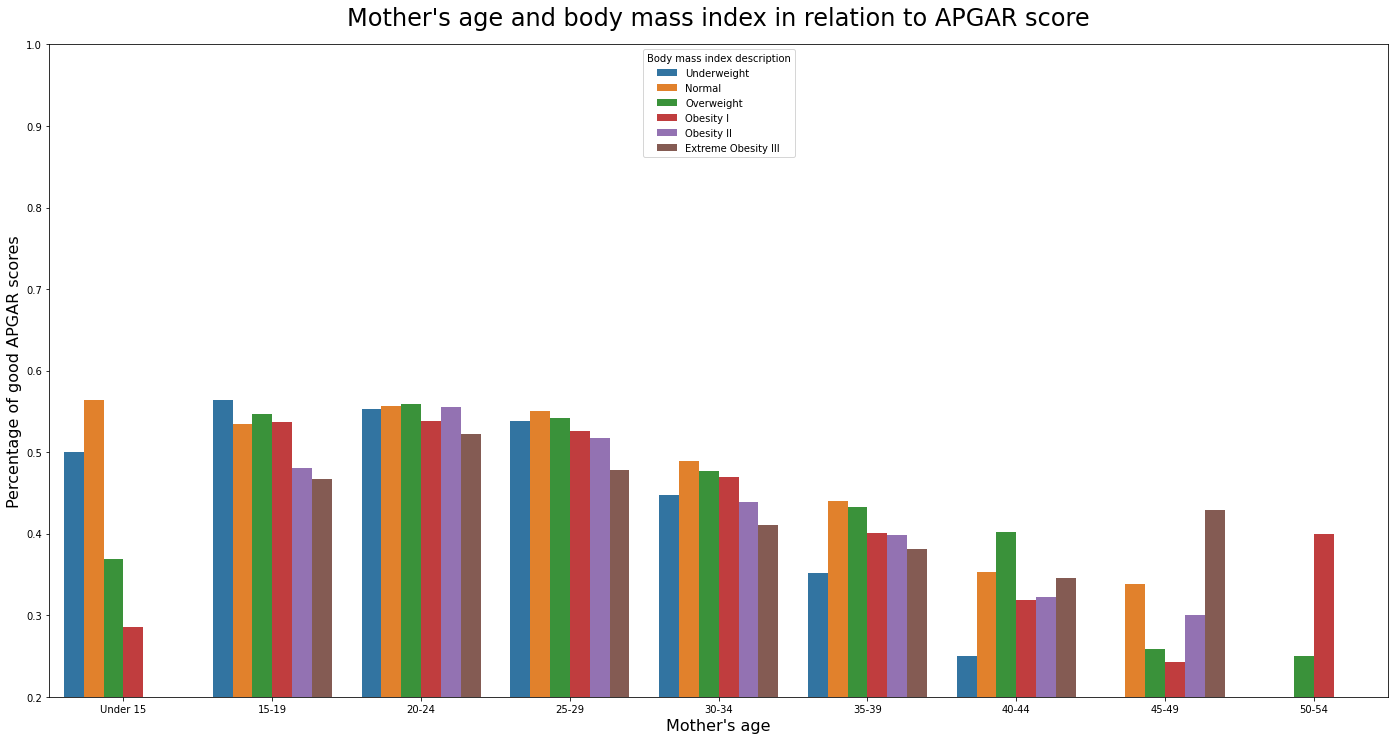

In [25]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Mothers age description', y='APGAR score', hue='Body mass index description', data=df.sort_values(['Mothers Age Recode 9', 'Body Mass Index Recode']), ci=None)
plt.title("Mother's age and body mass index in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Mother's age", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.2, 1)
plt.show()

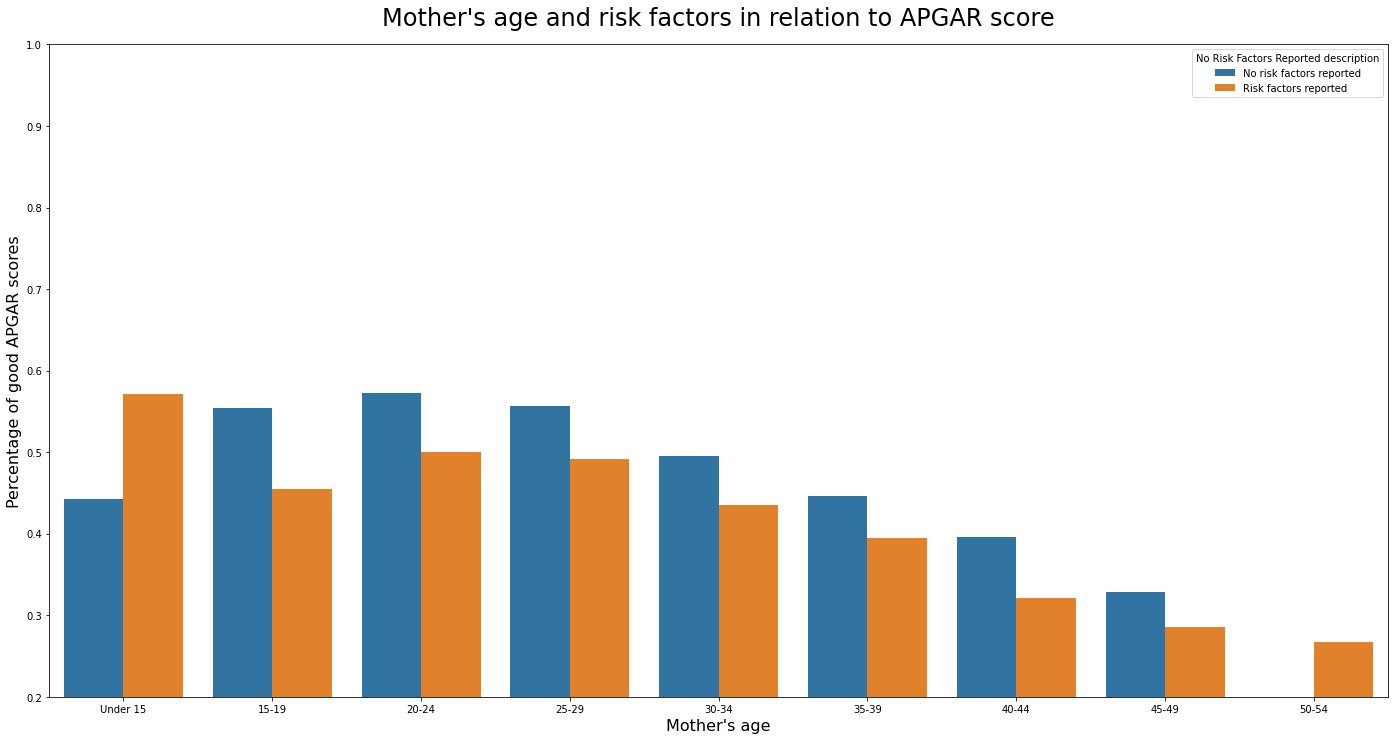

In [26]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Mothers age description', y='APGAR score', hue='No Risk Factors Reported description', data=df.sort_values(['Mothers Age Recode 9', 'Body Mass Index Recode']), ci=None)
plt.title("Mother's age and risk factors in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Mother's age", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.2, 1)
plt.show()

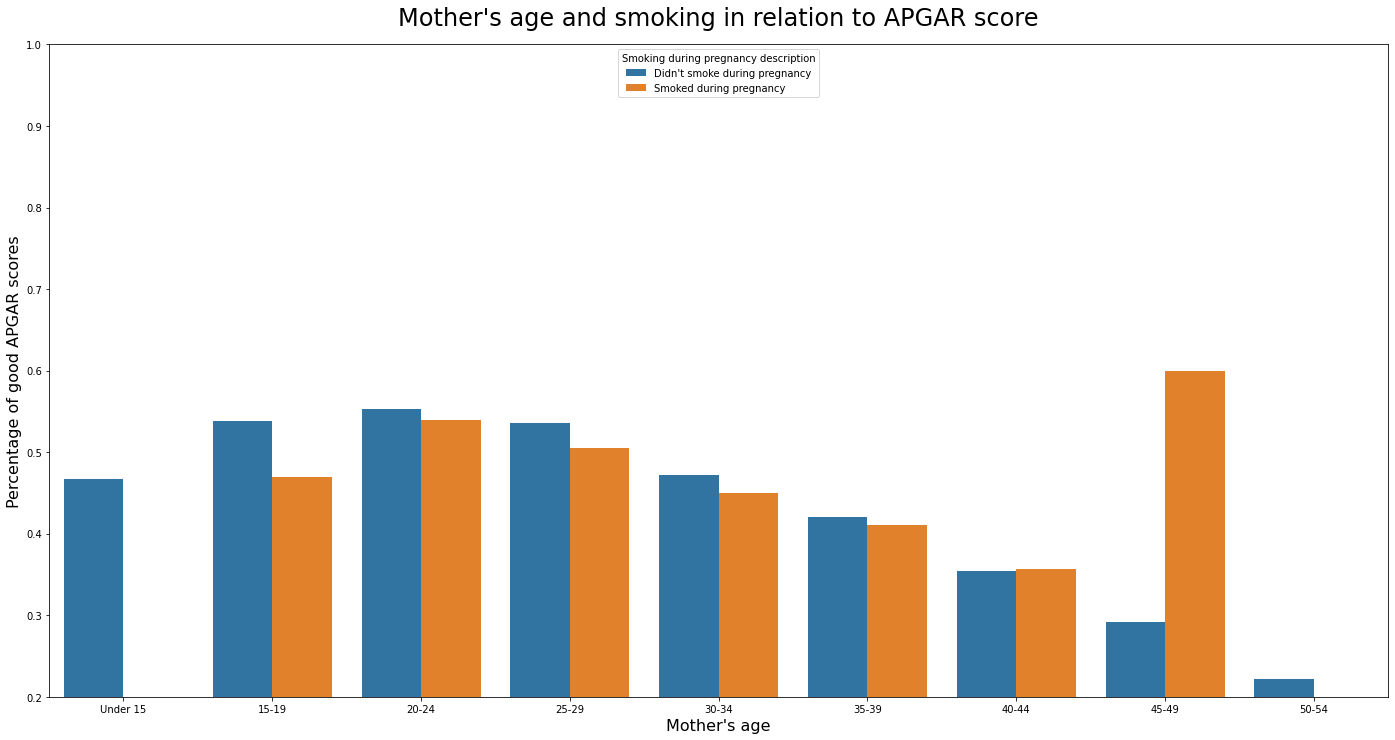

In [27]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Mothers age description', y='APGAR score', hue='Smoking during pregnancy description', data=df.sort_values(['Mothers Age Recode 9', 'Smoked during pregnancy']), ci=None)
plt.title("Mother's age and smoking in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Mother's age", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.2, 1)
plt.show()

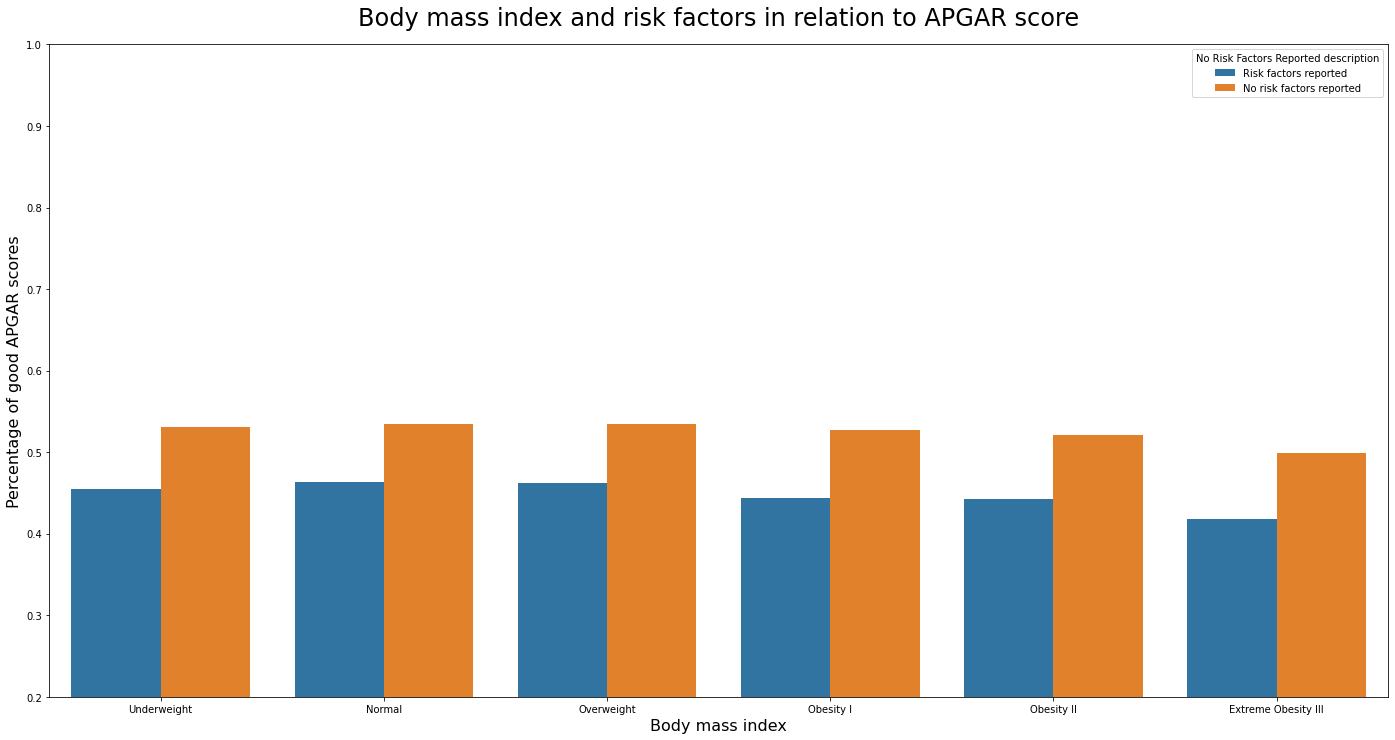

In [28]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Body mass index description', y='APGAR score', hue='No Risk Factors Reported description', data=df.sort_values(['Body Mass Index Recode', 'No Risk Factors Reported']), ci=None)
plt.title("Body mass index and risk factors in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Body mass index", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.2, 1)
plt.show()

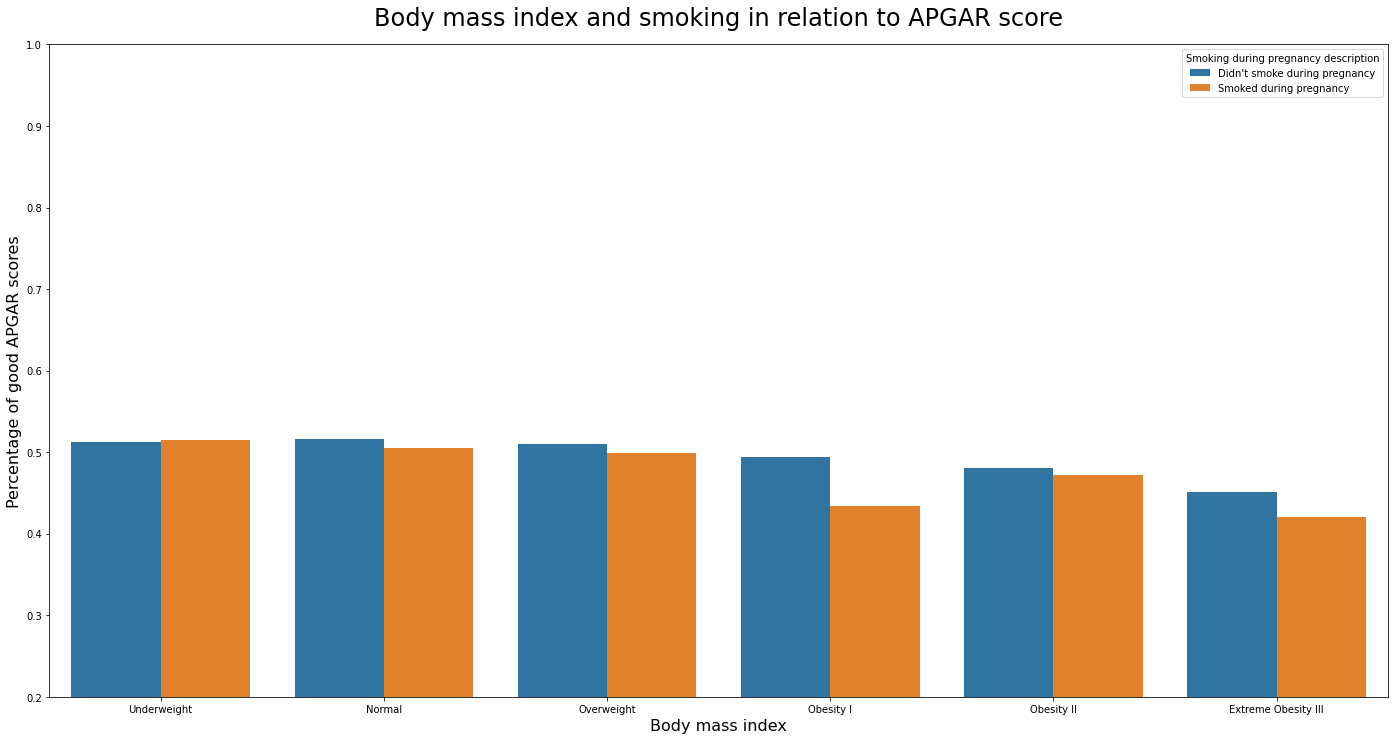

In [29]:
plt.figure(figsize=(24, 12))
sns.barplot(x='Body mass index description', y='APGAR score', hue='Smoking during pregnancy description', data=df.sort_values(['Body Mass Index Recode', 'Smoked during pregnancy']), ci=None)
plt.title("Body mass index and smoking in relation to APGAR score", fontsize=24, y=1.02)
plt.xlabel("Body mass index", fontsize=16)
plt.ylabel("Percentage of good APGAR scores", fontsize=16)
plt.ylim(0.2, 1)
plt.show()

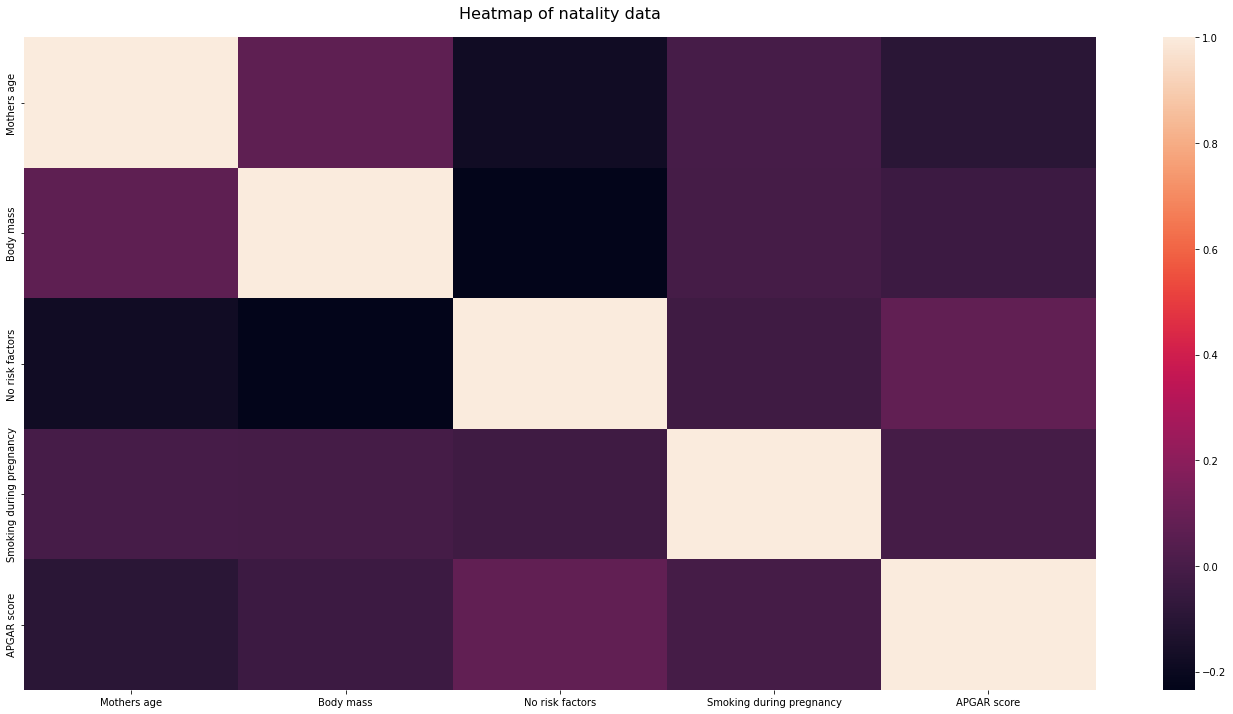

In [30]:
df_corr = df[['Mothers Age Recode 9', 'Body Mass Index Recode', 'No Risk Factors Reported', 'Smoked during pregnancy', 'APGAR score']].corr()
axis_labels = ["Mothers age", "Body mass", "No risk factors", "Smoking during pregnancy", "APGAR score"]

plt.figure(figsize=(24, 12))
sns.heatmap(df_corr, xticklabels=axis_labels, yticklabels=axis_labels)
plt.title("Heatmap of natality data", fontsize=16, y=1.02)
plt.show()

### Pozbycie się nieodpowiednich danych

In [31]:
df = df[(df['Mothers Age Recode 9'] != 1) & (df['Mothers Age Recode 9'] != 8) & (df['Mothers Age Recode 9'] != 9)]
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,Smoked during pregnancy,APGAR score,Mothers age description,Body mass index description,No Risk Factors Reported description,Smoking during pregnancy description,APGAR score description
0,25,4,26.5,3,1,0,1,25-29,Overweight,No risk factors reported,Didn't smoke during pregnancy,Good
1,28,4,24.0,2,0,0,1,25-29,Normal,Risk factors reported,Didn't smoke during pregnancy,Good
2,36,6,31.6,4,1,0,1,35-39,Obesity I,No risk factors reported,Didn't smoke during pregnancy,Good
3,32,5,24.0,2,1,0,1,30-34,Normal,No risk factors reported,Didn't smoke during pregnancy,Good
4,39,6,23.8,2,0,0,1,35-39,Normal,Risk factors reported,Didn't smoke during pregnancy,Good


### Konstrukcja modelu i predykcje

In [32]:
X = df[['Mothers Age Recode 9', 'Body Mass Index Recode', 'No Risk Factors Reported', 'Smoked during pregnancy']]
y = df['APGAR score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [34]:
print(confusion_matrix(y_test, y_pred))

[[6631 5795]
 [5406 7095]]


In [35]:
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54     12426
           1       0.55      0.57      0.56     12501

    accuracy                           0.55     24927
   macro avg       0.55      0.55      0.55     24927
weighted avg       0.55      0.55      0.55     24927



In [36]:
print(f1_score(y_test, y_pred))

0.5588594383836792


Widzimy, że model tym razem przewiduje negatywne wyniki APGAR. Jednak wciąż często myli niski wynik APGAR z wysokim wynikiem APGAR. Możemy jednak spróbować wyciągnąć jakieś charakterystyki, które zdaniem modelu odróżniają dzieci z wysokim a dzieci z niskim wynikiem APGAR

In [37]:
model.classes_

array([0, 1], dtype=int64)

In [38]:
model.coef_

array([[-0.14168706, -0.02560662,  0.2346564 , -0.05788319]])

In [39]:
model.intercept_

array([0.54846416])

In [40]:
model.n_features_in_

4

In [41]:
model.feature_names_in_

array(['Mothers Age Recode 9', 'Body Mass Index Recode',
       'No Risk Factors Reported', 'Smoked during pregnancy'],
      dtype=object)

In [42]:
model.n_iter_

array([18])

Widzimy, że największą wagę model przypisuje wieku matki i różnych ryzykach związanych z ciążą. Najmniejszą wagę model przypisuje do faktu czy kobieta paliła w ciąży czy nie <br>
Nasz notebook zakończymy wykresem ROC czyli wykresem pokazującym nam możliwości diagnostyczne naszego modelu

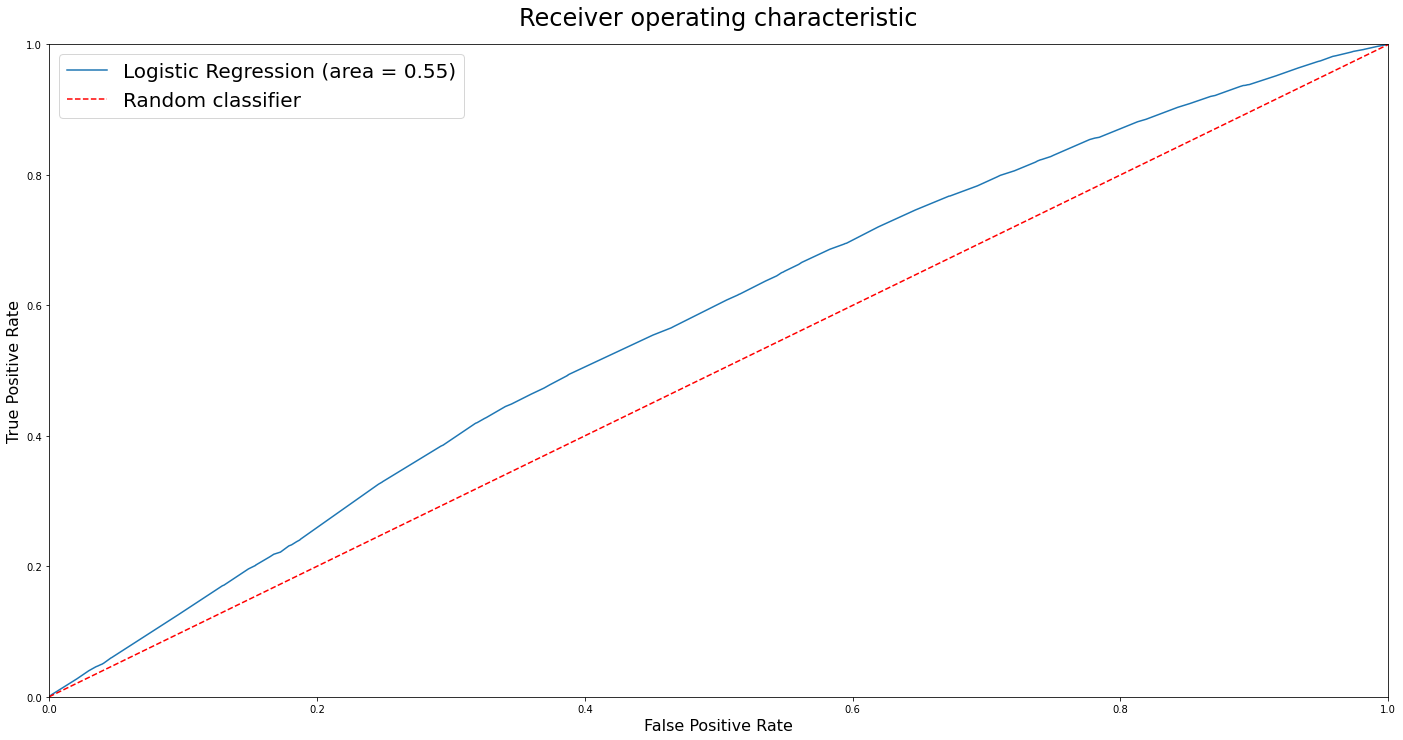

In [43]:
roc_score = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds  = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(24, 12))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], 'r--', label='Random classifier')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=24, y=1.02)
plt.legend(fontsize=20)
plt.show()

Widzimy, że nasz model działa niewiele lepiej od losowego klasyfikatora. Z powyższego wykresu, macierzy pomyłek i raportu klasyfikacyjnego wynika, że nie udało nam się zbudować dobrego modelu do predykcji. <br>
Przyczyn tego stanu rzeczy można doszukiwać się w wielu rzeczach, ale z analizy danych kilka z nich wyróżnia się jako główne przyczyny porażki:
1. Dataset z którym pracujemy jest bardzo niezbalansowany. Około 90% dzieci ma wynik APGAR równy 9
2. Nie przeanalizowaliśmy wszystkich czynników mogących mieć wpływ na wynik APGAR, tylko wybraliśmy te, które uznaliśmy za sensowne do dalszej analizy
3. Spłyciliśmy problem do predykcji wyniku APGAR w skali 0-6 i wyniku APGAR w skali 7-10. Jednak jak możemy się domyśleć, zę za dziecko z wynikiem APGAR = 3, a dziecko z wynikiem APGAR = 6 odpowiadają inne czynniki
4. Użyliśmy bardzo prostego modelu do predykcji wyniku APGAR. Regresja logistyczna może nie jest w stanie opisać złożoności czynników odpowiadających za wynik APGAR

Kolejne kroki w naszej analizie mogłyby być następujące:
1. Augmentacja danych tak, żeby wyrównać braki w danych
2. Przeanalizowanie wszystkich czynników, które mogą odpowiadać za wynik APGAR
3. Podzielenie wyników APGAR na sensowniejsze kategorie
4. Użycie bardziej zaawansowanego modelu do predykcji (np. drzewo decyzyjne czy sieci neuronowe)